Data set:
https://www.kaggle.com/datasets/blastchar/telco-customer-churn
 
A subscription-based digital service company is facing customer churn, where users cancel their subscriptions after a few months.
Key challenges:
Customer behavior patterns are complex and non-linear
Some customers leave suddenly despite appearing loyal
A single model fails to capture small but important signals
Business wants a high-performance and scalable solution
The company already tried:
Logistic Regression
Decision Tree
Random Forest
…but results are not satisfactory.
 
Tasks:
Load the dataset and study customer attributes such as:
Tenure
Monthly charges
Contract type
Payment method
Identify the target variable and 

explain its business meaning.

Build a baseline classification model using a tree-based approach.
Evaluate its performance using:
Accuracy
Confusion Matrix
Recall for churn customers

Focused customer retention programs
 
Build an ensemble model that improves predictions iteratively.
Train the model using historical customer data.
Observe how the model:
Focuses more on previously misclassified customers
Learns complex patterns gradually
 
Evaluate the model using:
Accuracy
Precision
Recall
F1-Score
Compare the results with the baseline model.
 
Analyze the following:
How many churn customers were correctly identified?
How many loyal customers were wrongly flagged?
Answer:
Is it better to wrongly flag a loyal customer?
Or miss a churn customer?
Which metric should the business prioritize and why?
 
Identify which customer features contribute most to churn prediction.
Explain how understanding feature importance helps business teams.
 

In [1]:
import numpy as np
import pandas as pd


In [13]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score

In [2]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn .csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Drop customer ID
df.drop('customerID', axis=1, inplace=True)

# One-hot encoding
df = pd.get_dummies(df, drop_first=True)

In [4]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Recall (Churn):", recall_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7782515991471215
Recall (Churn): 0.5962566844919787


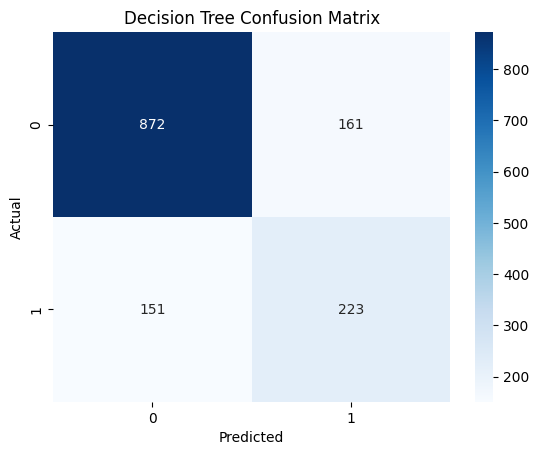

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, f1_score

gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Precision:", precision_score(y_test, y_pred_gb))
print("Recall:", recall_score(y_test, y_pred_gb))
print("F1-Score:", f1_score(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.7960199004975125
Precision: 0.6407766990291263
Recall: 0.5294117647058824
F1-Score: 0.5797950219619327


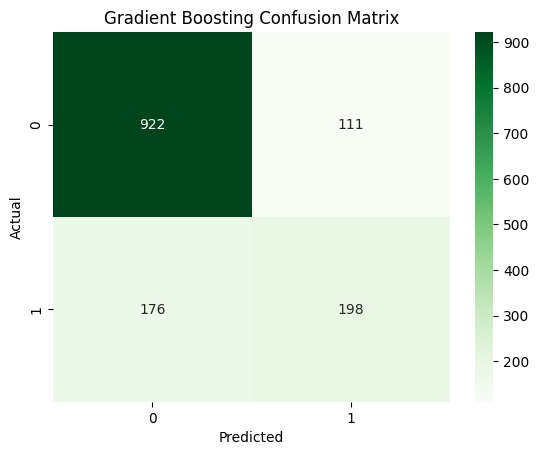

In [17]:
cm = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Gradient Boosting Confusion Matrix")
plt.show()

In [19]:
base_model=DecisionTreeClassifier(max_depth=1)
ada = AdaBoostClassifier(
    estimator=base_model,
    n_estimators=200,
    learning_rate=0.5,
    random_state=42
)

ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)

# Metrics
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Precision:", precision_score(y_test, y_pred_ada))
print("Recall:", recall_score(y_test, y_pred_ada))
print("F1 Score:", f1_score(y_test, y_pred_ada))

c:\Users\Nishath Tabassum\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.7960199004975125
Precision: 0.638095238095238
Recall: 0.5374331550802139
F1 Score: 0.5834542815674891


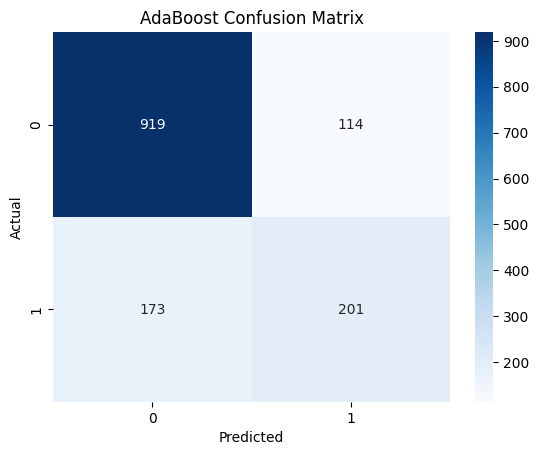

In [20]:
cm = confusion_matrix(y_test, y_pred_ada)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("AdaBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [22]:
from xgboost import XGBClassifier
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

In [23]:
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))

XGBoost Accuracy: 0.7867803837953091
Precision: 0.6149068322981367
Recall: 0.5294117647058824
F1 Score: 0.5689655172413793


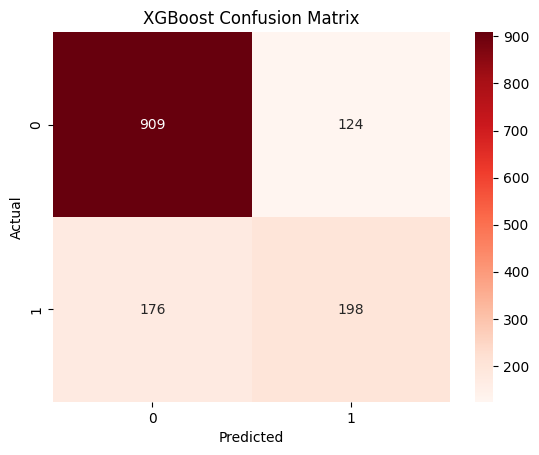

In [24]:
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()